In [3]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 975.2 kB/s eta 0:00:14
   ---------------------------------------- 0.1/13.3 MB 1.1 MB/s eta 0:00:12
    --------------------------------------- 0.2/13.3 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.3/13.3 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.3/13.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.4/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.4/13.3 MB 1.7 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/13.3 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/13.3 MB 2.8 MB/s eta 0:00:05
   -- ------------------------------------- 1.0/13.3 MB 2.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.1/13.3 MB 2.6 MB/s eta 0:00:05
   --- ----

         date  max_temperature_s  max_wind_speed_s  min_temperature_s  \
0  2024-05-21               3.83              7.50               2.98   
1  2024-05-20               3.93              7.63               2.99   
2  2024-05-19               4.03              7.72               3.03   
3  2024-05-18               4.02              7.64               3.08   
4  2024-05-17               4.10              8.17               3.07   

   min_wind_speed_s  rain_s  snow_on_ground_v  
0              5.08    6.83               0.0  
1              5.21    6.71               0.0  
2              5.46    6.91               0.0  
3              5.68    6.71               0.0  
4              5.85    6.91               0.0  
date                 0
max_temperature_s    0
max_wind_speed_s     0
min_temperature_s    0
min_wind_speed_s     0
rain_s               0
snow_on_ground_v     0
dtype: int64
        Date  Erosion (m)
0 2024-05-21     6.081096
1 2024-05-20     6.080548
2 2024-05-19     6.08

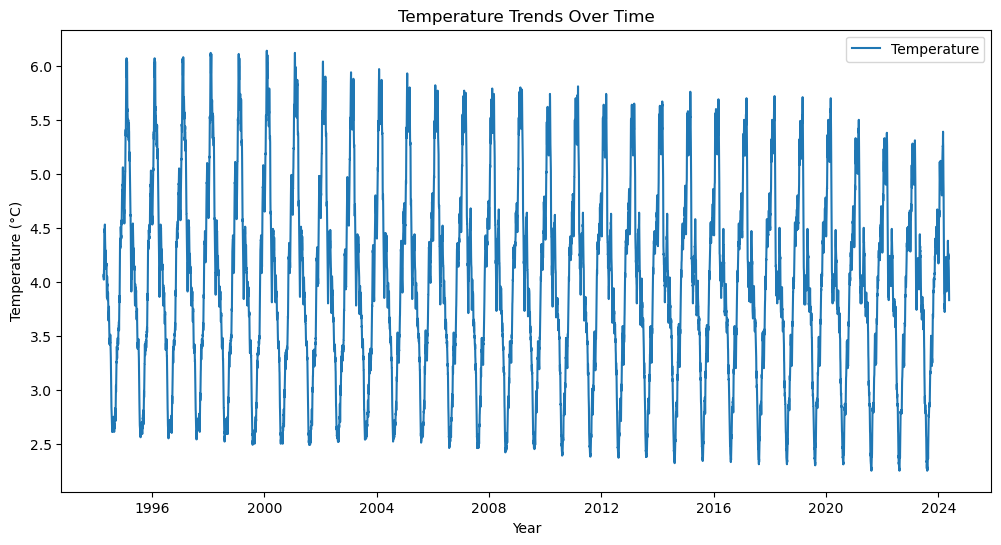

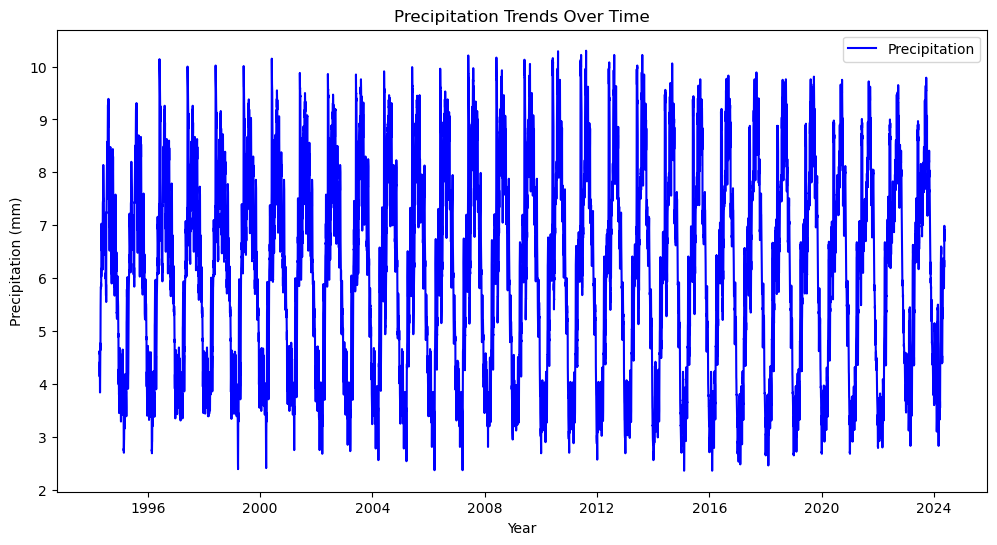

       max_temperature_s  max_wind_speed_s  min_temperature_s  \
count       11000.000000      11000.000000       11000.000000   
mean            4.003967          9.589818           3.936252   
std             0.900764          2.524742           1.133303   
min             2.250000          5.420000           2.530000   
25%             3.350000          6.970000           3.090000   
50%             4.010000          9.590000           3.440000   
75%             4.572500         12.090000           4.660000   
max             6.140000         14.230000           7.150000   

       min_wind_speed_s        rain_s  snow_on_ground_v  avg_wind_speed  
count      11000.000000  11000.000000      11000.000000    11000.000000  
mean           6.792796      6.180374         14.669627        8.191307  
std            1.824385      1.920291         22.384263        2.156227  
min            3.310000      2.360000          0.000000        4.405000  
25%            5.080000      4.330000       

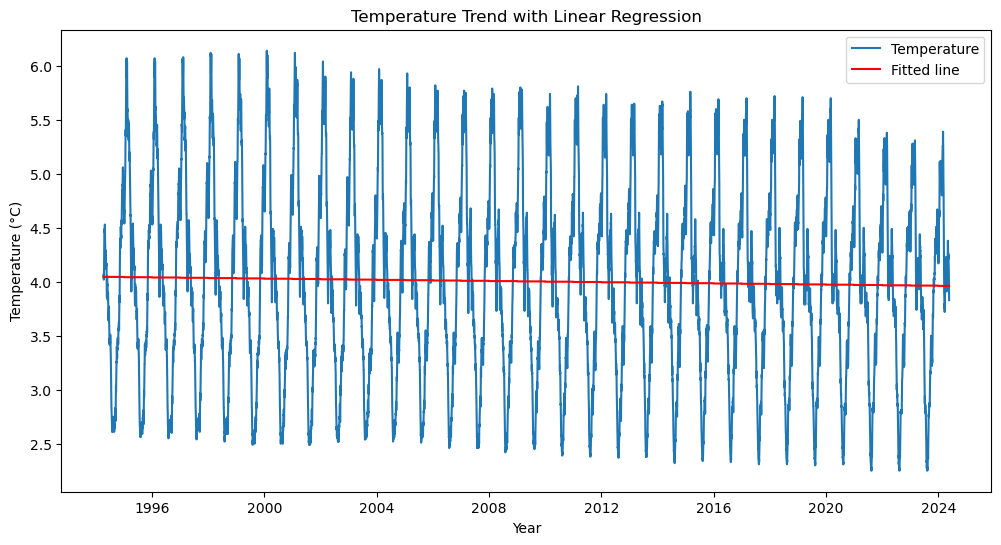

Average wind speed trend: slope=0.010153981649407668, intercept=-12.206318453320053, p-value=1.7141226245718775e-05


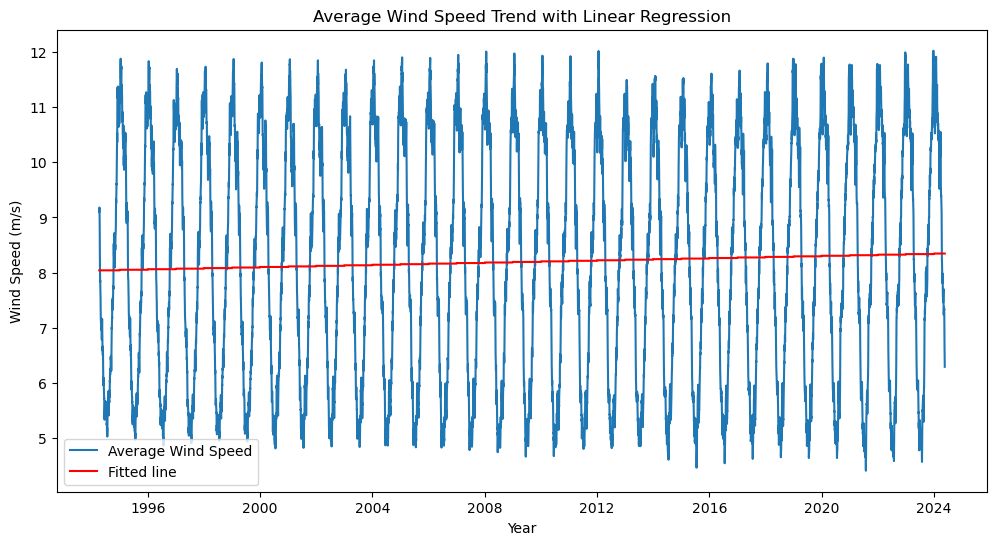

Rain trend: slope=-0.0025915874787954592, intercept=11.386433018188905, p-value=0.21809021649281343


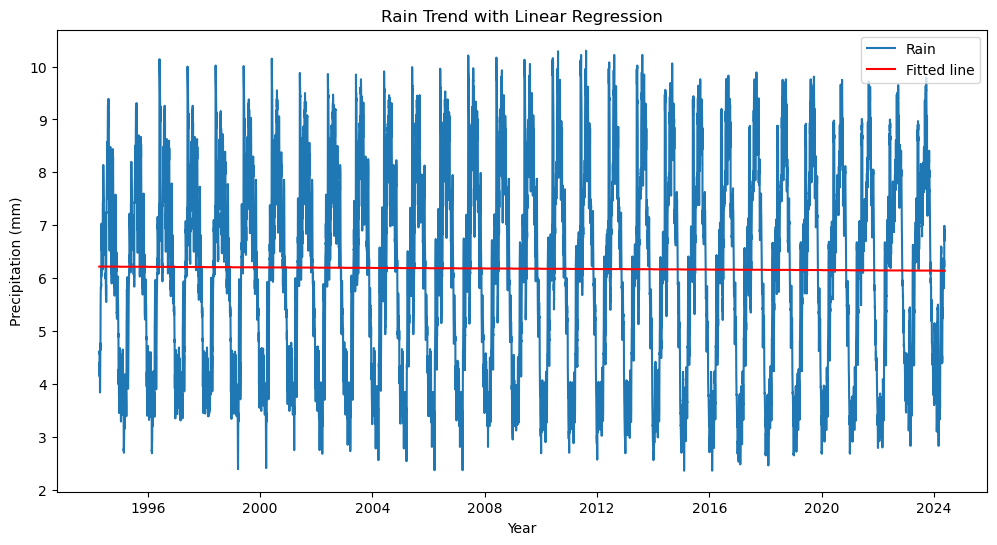

Snow on ground trend: slope=0.21092364036931685, intercept=-409.0401667349967, p-value=7.088078163600843e-18


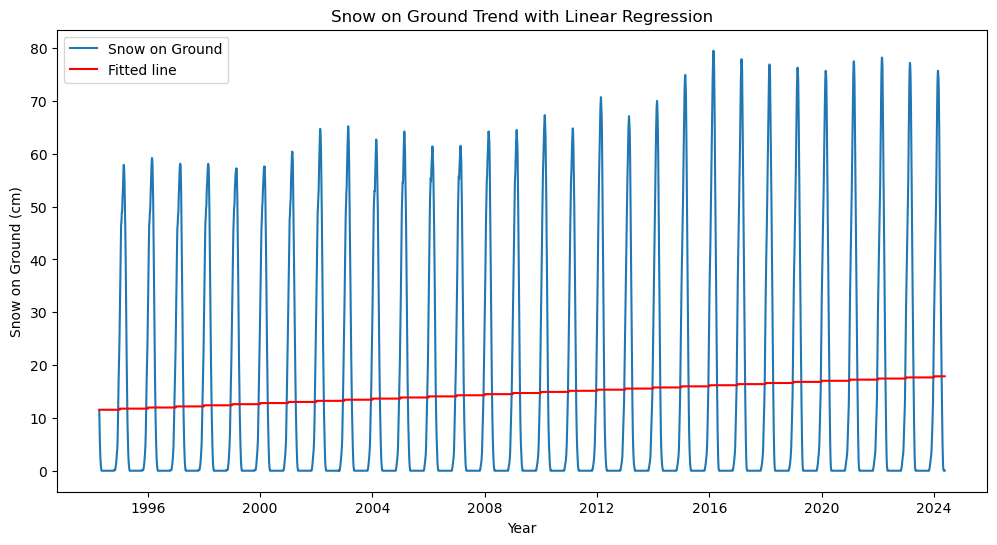

                   max_temperature_s  max_wind_speed_s  min_temperature_s  \
max_temperature_s           1.000000          0.810854           0.853948   
max_wind_speed_s            0.810854          1.000000           0.808008   
min_temperature_s           0.853948          0.808008           1.000000   
min_wind_speed_s            0.811844          0.965519           0.778261   
rain_s                     -0.830428         -0.788168          -0.799911   
snow_on_ground_v            0.784727          0.718062           0.924988   
avg_wind_speed              0.818168          0.993917           0.802295   
Date                       -0.042810          0.056394          -0.042972   
Erosion (m)                -0.042810          0.056394          -0.042972   

                   min_wind_speed_s    rain_s  snow_on_ground_v  \
max_temperature_s          0.811844 -0.830428          0.784727   
max_wind_speed_s           0.965519 -0.788168          0.718062   
min_temperature_s          0

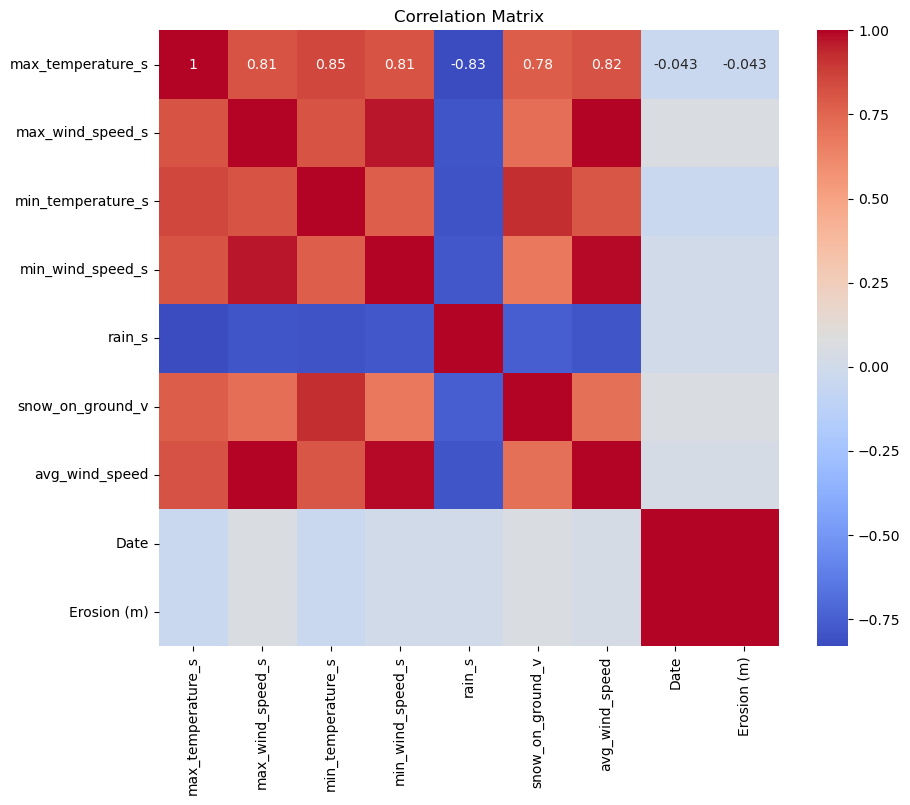

22:40:22 - cmdstanpy - INFO - Chain [1] start processing
22:40:23 - cmdstanpy - INFO - Chain [1] done processing


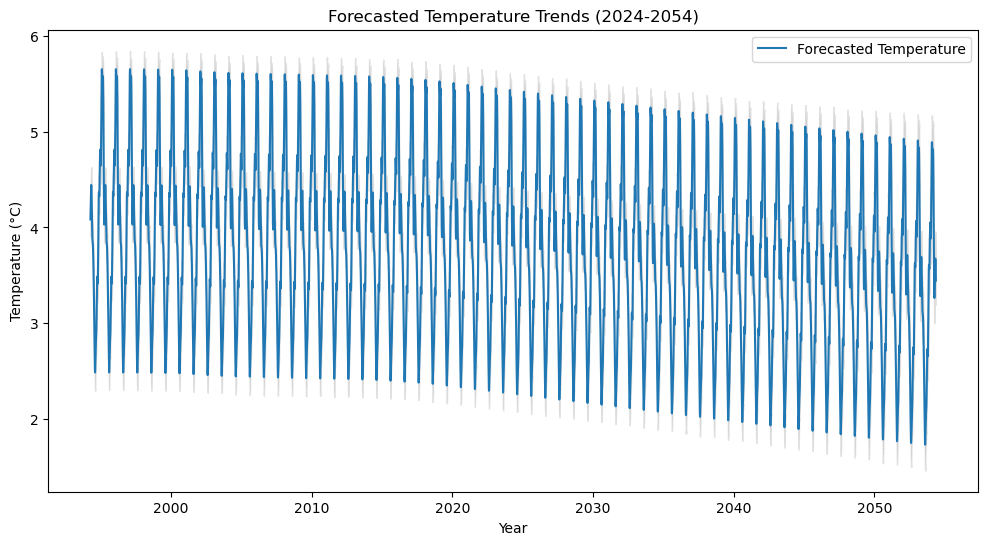

22:40:26 - cmdstanpy - INFO - Chain [1] start processing
22:40:27 - cmdstanpy - INFO - Chain [1] done processing


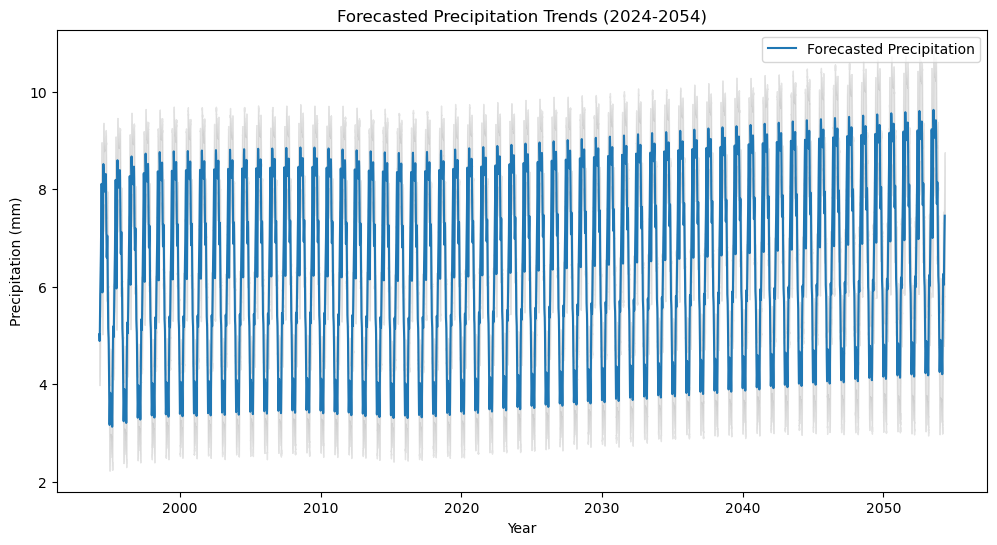

22:40:30 - cmdstanpy - INFO - Chain [1] start processing
22:40:31 - cmdstanpy - INFO - Chain [1] done processing


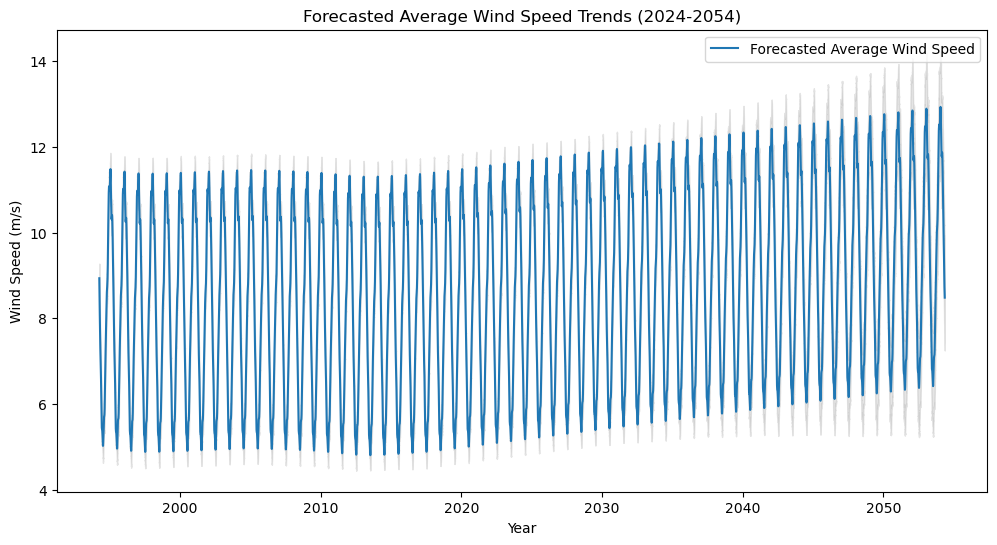

22:40:35 - cmdstanpy - INFO - Chain [1] start processing
22:40:36 - cmdstanpy - INFO - Chain [1] done processing


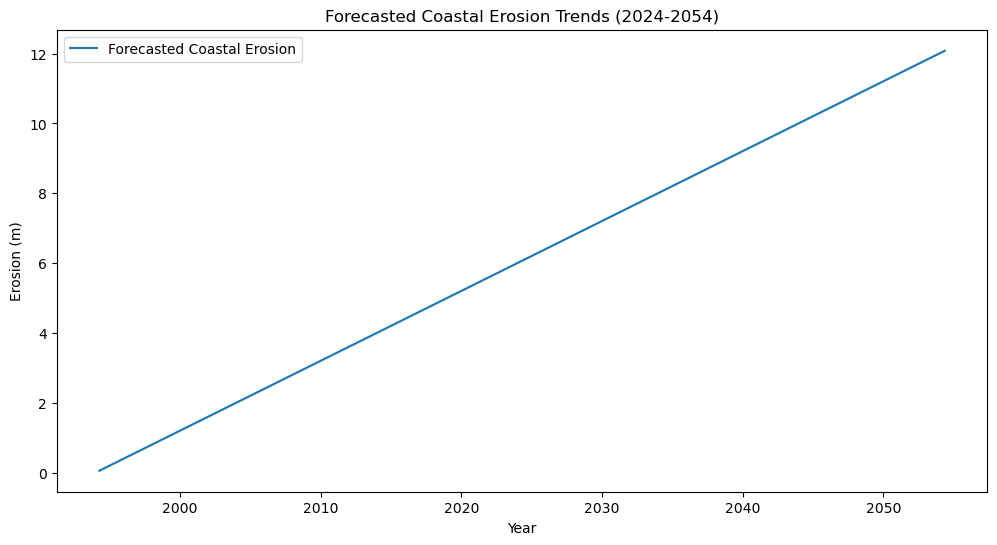

In [5]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from prophet import Prophet

# Loading the climate data from climate_data.csv
df = pd.read_csv('climate_data.csv')

# Displaying the first few rows of the dataframe to understand its structure
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as appropriate
df = df.dropna()

# Convert the date column to datetime format if it's not already
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    # Set the date column as the index
    df.set_index('date', inplace=True)
else:
    print("The 'date' column is not present in the DataFrame.")

# Calculate average wind speed
if 'max_wind_speed_s' in df.columns and 'min_wind_speed_s' in df.columns:
    df['avg_wind_speed'] = (df['max_wind_speed_s'] + df['min_wind_speed_s']) / 2

# Calculate daily erosion rates and create the coastal_erosion_data.csv
dates = df.index
daily_erosion_rate = 0.20 / 365  # meters per day
cumulative_erosion = daily_erosion_rate * (dates - pd.Timestamp('1994-01-01')).days

# Create a DataFrame for coastal erosion data
coastal_erosion_data = pd.DataFrame({
    'Date': dates,
    'Erosion (m)': cumulative_erosion
})

# Save the DataFrame to a CSV file
coastal_erosion_data.to_csv('coastal_erosion_data.csv', index=False)

# Display the created DataFrame
print(coastal_erosion_data.head())

# Plotting temperature trends over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['max_temperature_s'], label='Temperature')
plt.title('Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.savefig('temperature_trends.png')
plt.show()

# Plotting precipitation trends over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rain_s'], label='Precipitation', color='b')
plt.title('Precipitation Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.savefig('precipitation_trends.png')
plt.show()

# Summary statistics
print(df.describe())

# Linear regression analysis for temperature trend
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(df.index.year, df['max_temperature_s'])
print(f"Temperature trend: slope={slope_temp}, intercept={intercept_temp}, p-value={p_value_temp}")

# Plotting the regression line for temperature
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['max_temperature_s'], label='Temperature')
plt.plot(df.index, intercept_temp + slope_temp * df.index.year, 'r', label='Fitted line')
plt.title('Temperature Trend with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.savefig('temperature_trend_regression.png')
plt.show()

# Linear regression analysis for average wind speed
if 'avg_wind_speed' in df.columns:
    slope_avg_wind, intercept_avg_wind, r_value_avg_wind, p_value_avg_wind, std_err_avg_wind = linregress(df.index.year, df['avg_wind_speed'])
    print(f"Average wind speed trend: slope={slope_avg_wind}, intercept={intercept_avg_wind}, p-value={p_value_avg_wind}")

    # Plotting the regression line for average wind speed
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['avg_wind_speed'], label='Average Wind Speed')
    plt.plot(df.index, intercept_avg_wind + slope_avg_wind * df.index.year, 'r', label='Fitted line')
    plt.title('Average Wind Speed Trend with Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Wind Speed (m/s)')
    plt.legend()
    plt.savefig('avg_wind_speed_trend_regression.png')
    plt.show()
else:
    print("The 'avg_wind_speed' column is not present in the DataFrame.")

# Linear regression analysis for rain
if 'rain_s' in df.columns:
    slope_rain, intercept_rain, r_value_rain, p_value_rain, std_err_rain = linregress(df.index.year, df['rain_s'])
    print(f"Rain trend: slope={slope_rain}, intercept={intercept_rain}, p-value={p_value_rain}")

    # Plotting the regression line for rain
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['rain_s'], label='Rain')
    plt.plot(df.index, intercept_rain + slope_rain * df.index.year, 'r', label='Fitted line')
    plt.title('Rain Trend with Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Precipitation (mm)')
    plt.legend()
    plt.savefig('rain_trend_regression.png')
    plt.show()
else:
    print("The 'rain_s' column is not present in the DataFrame.")

# Linear regression analysis for snow on the ground
if 'snow_on_ground_v' in df.columns:
    slope_snow, intercept_snow, r_value_snow, p_value_snow, std_err_snow = linregress(df.index.year, df['snow_on_ground_v'])
    print(f"Snow on ground trend: slope={slope_snow}, intercept={intercept_snow}, p-value={p_value_snow}")

    # Plotting the regression line for snow on the ground
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['snow_on_ground_v'], label='Snow on Ground')
    plt.plot(df.index, intercept_snow + slope_snow * df.index.year, 'r', label='Fitted line')
    plt.title('Snow on Ground Trend with Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Snow on Ground (cm)')
    plt.legend()
    plt.savefig('snow_on_ground_trend_regression.png')
    plt.show()
else:
    print("The 'snow_on_ground_v' column is not present in the DataFrame.")

# Load coastal erosion data
erosion_df = pd.read_csv('coastal_erosion_data.csv')

# Ensure the 'Date' column is in datetime format
erosion_df['Date'] = pd.to_datetime(erosion_df['Date'])

# Merge climate data with erosion data based on the date
merged_df = pd.merge(df, erosion_df, left_index=True, right_on='Date')

# Calculate correlation
correlation = merged_df.corr()
print(correlation)

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Add future trending using prophet
def forecast_future_trend(data, date_col, value_col, periods=10950):
    df_prophet = data.rename(columns={date_col: 'ds', value_col: 'y'})
    model = Prophet()
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Forecast future temperature trends
if 'max_temperature_s' in df.columns:
    temperature_forecast = forecast_future_trend(df[['max_temperature_s']].reset_index(), 'date', 'max_temperature_s')
    plt.figure(figsize=(12, 6))
    plt.plot(temperature_forecast['ds'], temperature_forecast['yhat'], label='Forecasted Temperature')
    plt.fill_between(temperature_forecast['ds'], temperature_forecast['yhat_lower'], temperature_forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title('Forecasted Temperature Trends (2024-2054)')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.savefig('forecasted_temperature_trends.png')
    plt.show()

# Forecast future precipitation trends
if 'rain_s' in df.columns:
    precipitation_forecast = forecast_future_trend(df[['rain_s']].reset_index(), 'date', 'rain_s')
    plt.figure(figsize=(12, 6))
    plt.plot(precipitation_forecast['ds'], precipitation_forecast['yhat'], label='Forecasted Precipitation')
    plt.fill_between(precipitation_forecast['ds'], precipitation_forecast['yhat_lower'], precipitation_forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title('Forecasted Precipitation Trends (2024-2054)')
    plt.xlabel('Year')
    plt.ylabel('Precipitation (mm)')
    plt.legend()
    plt.savefig('forecasted_precipitation_trends.png')
    plt.show()

# Forecast future average wind speed trends
if 'avg_wind_speed' in df.columns:
    avg_wind_forecast = forecast_future_trend(df[['avg_wind_speed']].reset_index(), 'date', 'avg_wind_speed')
    plt.figure(figsize=(12, 6))
    plt.plot(avg_wind_forecast['ds'], avg_wind_forecast['yhat'], label='Forecasted Average Wind Speed')
    plt.fill_between(avg_wind_forecast['ds'], avg_wind_forecast['yhat_lower'], avg_wind_forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title('Forecasted Average Wind Speed Trends (2024-2054)')
    plt.xlabel('Year')
    plt.ylabel('Wind Speed (m/s)')
    plt.legend()
    plt.savefig('forecasted_avg_wind_speed_trends.png')
    plt.show()

# Forecast future coastal erosion trends
if 'Erosion (m)' in coastal_erosion_data.columns:
    erosion_forecast = forecast_future_trend(coastal_erosion_data, 'Date', 'Erosion (m)')
    plt.figure(figsize=(12, 6))
    plt.plot(erosion_forecast['ds'], erosion_forecast['yhat'], label='Forecasted Coastal Erosion')
    plt.fill_between(erosion_forecast['ds'], erosion_forecast['yhat_lower'], erosion_forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title('Forecasted Coastal Erosion Trends (2024-2054)')
    plt.xlabel('Year')
    plt.ylabel('Erosion (m)')
    plt.legend()
    plt.savefig('forecasted_erosion_trends.png')
    plt.show()